In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home = os.environ['HOME'] # if the HOME variable is set to '/Users/lou', we are on Lou's mac, else Github
if home == '/Users/lou':
    filename = '/Users/lou/GITHubProjects/Thinkful/Datafiles/planecrashinfo_20181121001952_clean.csv'
else:
    filename = 'planecrashinfo_20181121001952_clean.csv'
    
crashes_df = pd.read_csv(filename)

# let's remove all the NaN's for the numeric data types
crashes_df = crashes_df.dropna(subset=['aboard_count'])
crashes_df = crashes_df.dropna(subset=['fatal_count'])  
crashes_df = crashes_df.dropna(subset=['ground'])

# let's strip off all leading and trailing spaces from the numeric data types
crashes_df = crashes_df[(crashes_df['aboard_count'].str.strip() != '?')] # remove unknown aboard_cont
crashes_df = crashes_df[(crashes_df['ground'].str.strip()       != '?')] # remove unknown ground count
crashes_df = crashes_df[(crashes_df['fatal_count'].str.strip()  != '?')] # remove unknown fatal_count

# let's convert all of these numeric data types to numerics
crashes_df['ground']       = pd.to_numeric(crashes_df['ground'])
crashes_df['aboard_count'] = pd.to_numeric(crashes_df['aboard_count'])
crashes_df['fatal_count']  = pd.to_numeric(crashes_df['fatal_count'])
crashes_df['crashdate'] =    pd.to_datetime(crashes_df['crashdate'])
crashes_df['crashyear'] =    crashes_df['crashdate'].dt.year

FATALITIES = 150
# we only want big crashes, more than n fatalties
crashes_big = crashes_df[(crashes_df['fatal_count']  > FATALITIES)]
crashes_df = crashes_big
crashes_df.index.name = None

In [2]:
# crashes_df_ac_type for Boeing B-747
crashes_df_ac_type = crashes_df[(crashes_df['ac_type'].str.startswith('Boeing B-747'))]
crashes_df_ac_type.sort_values(['ac_type', 'fatal_count'],ascending=True) # sort it
crashes_df_ac_type = crashes_df_ac_type.groupby('ac_type')[['country_code','fatal_count', 'ground', 'aboard_count','crashdate', 'crashyear', 'operator_code', 'ac_type']].mean()
crashes_df_ac_type.sort_values(['crashyear', 'fatal_count'],ascending=True) # sort it

,country_code,fatal_count,ground,aboard_count,crashyear,operator_code
ac_type,,,,,,
Boeing B-747-121 / Boeing B-747-206B,1780.0,583.0,0.0,644.0,1977.0,20970.0
Boeing B-747-237B,2175.0,271.0,0.0,271.0,1981.5,3180.0
Boeing B-747-283B,4690.0,181.0,0.0,192.0,1983.0,6850.0
Boeing B-747-230B,4310.0,269.0,0.0,269.0,1983.0,15020.0
Boeing B-747-SR46,3020.0,520.0,0.0,524.0,1985.0,14280.0
Boeing B-747-244B Combi,2880.0,159.0,0.0,159.0,1987.0,24690.0
Boeing B-747-121A,4440.0,259.0,11.0,259.0,1988.0,20960.0
Boeing B-747-131,5120.0,230.0,0.0,230.0,1996.0,26660.0
Boeing B-747-168B / Ilyushin IL-76TD,2870.0,349.0,0.0,349.0,1996.0,23400.0


### Let's plot the known crashes of the Boeing B-747 of crashes over 150 people over the last 40 years

### Questions to consider:
### Has there been a decrease in the fatalities involving the Boeing B-747 over the last 40 years?

### This chart appears to suggest that the trend line looks to be decreasing.

Text(0, 0.5, 'Fatal Count')

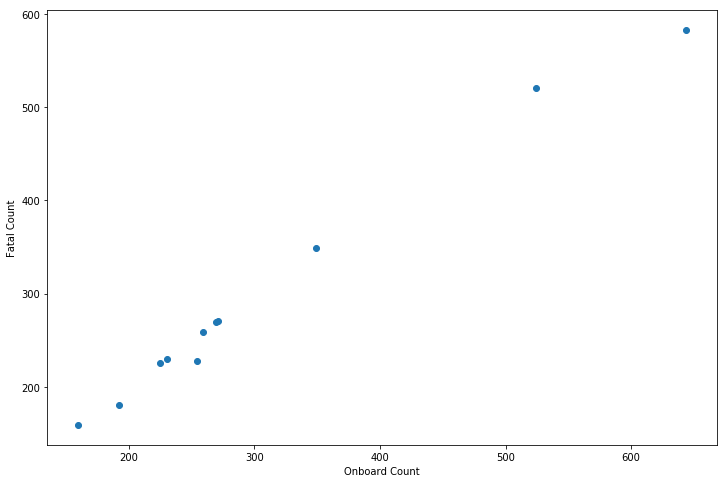

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(crashes_df_ac_type['aboard_count'], crashes_df_ac_type['fatal_count'])

plt.xlabel('Onboard Count')
plt.ylabel('Fatal Count')

In [1]:
# plt.rcParams['figure.figsize'] = [20, 16]
# plt.plot(crashes_df_ac_type['aboard_count'], crashes_df_ac_type['ground'])

crashes_df_ac_type.plot(kind='scatter', x='aboard_count',y= 'ground')
# crashes_df_ac_type.plot(kind='line')
plt.show()

NameError: name 'crashes_df_ac_type' is not defined

In [5]:
# Graph description 